In [26]:
# Import required libraries
import os
import requests
import json
import pandas as pd
import hvplot.pandas
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import datetime
import numpy as np
import numpy.random as rnd
import requests
from MCForecastTools import MCSimulation
from ipywidgets import widgets
%matplotlib inline

ModuleNotFoundError: No module named 'hvplot'

In [27]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

In [28]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE
alpaca = tradeapi.REST(
            alpaca_api_key,
            alpaca_secret_key,
            api_version = "v2")

In [29]:

timeframe = "1D"

today = str(datetime.datetime.today()).split()[0]

three_years_ago= str(datetime.datetime.today()- datetime.timedelta(days=1095)).split()[0]

start_date= pd.Timestamp(three_years_ago, tz="America/New_York").isoformat()

end_date= pd.Timestamp(today, tz="America/New_York").isoformat()
                       
limit_rows=1000
                           
tickers=["AGG", "SPY", "XLF", "QQQ", "EEM", "XLE", "GDX", "IWM", "IWV"]

In [30]:
print("Preparing 3 years of historical data... Please wait")
alpaca_df= alpaca.get_barset(
               tickers,
               timeframe,
               limit= limit_rows,
               start = start_date,
               end = end_date
).df

display(alpaca_df.head())
display(alpaca_df.tail())

Preparing 3 years of historical data... Please wait


AGG                                       EEM  \
                             open     high     low    close   volume   open   
time                                                                          
2018-08-16 00:00:00-04:00  106.38  106.420  106.24  106.390  2135827  41.92   
2018-08-17 00:00:00-04:00  106.43  106.545  106.38  106.460  1915186  41.62   
2018-08-20 00:00:00-04:00  106.59  106.680  106.53  106.650  2105513  42.31   
2018-08-21 00:00:00-04:00  106.58  106.620  106.51  106.575  2596721  42.83   
2018-08-22 00:00:00-04:00  106.66  106.710  106.57  106.660  1725557  42.98   

                                                            ...    XLE  \
                            high    low  close      volume  ...   open   
time                                                        ...          
2018-08-16 00:00:00-04:00  42.11  41.75  41.77  66452493.0  ...  72.26   
2018-08-17 00:00:00-04:00  42.31  41.52  42.21  63827483.0  ...  72.62   
2018-08-20 00:00:00-04:00  42.44  42.17  42.40  45200529.0  ...  72.63   
2018-08-21 00:00:00-04:00  43.11  42.80  42.93  63760470.0  ...  73.71   
2018-08-22 00:00:00-04:00  43.35  42.98  43.27  42685647.0  ...  73.93   

                                                               XLF          \
                             high      low  close    volume   open    high   
time                                                                         
2018-08-16 00:00:00-04:00  72.840  72.2200  72.43  12322849  27.87  28.190   
2018-08-17 00:00:00-04:00  72.800  72.3450  72.63   9295197  28.04  28.210   
2018-08-20 00:00:00-04:00  73.355  72.6000  73.11   7192157  28.17  28.310   
2018-08-21 00:00:00-04:00  74.060  73.3899  73.48   8606791  28.28  28.510   
2018-08-22 00:00:00-04:00  74.585  73.8800  74.36   8265854  28.25  28.376   

                                                   
                             low  close    volume  
time                                               
2018-08-16 00:00:00-04:00  27.87  28.10  40984808  
2018-08-17 00:00:00-04:00  28.03  28.16  36517847  
2018-08-20 00:00:00-04:00  28.13  28.25  25473384  
2018-08-21 00:00:00-04:00  28.22  28.36  42877193  
2018-08-22 00:00:00-04:00  28.23  28.29  24460821  

[5 rows x 45 columns]

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-08-09 00:00:00-04:00  115.89  115.9600  115.5800  115.59  5003990   
2021-08-10 00:00:00-04:00  115.65  115.6500  115.4350  115.44  6692325   
2021-08-11 00:00:00-04:00  115.46  115.7000  115.3400  115.55  6423130   
2021-08-12 00:00:00-04:00  115.49  115.5799  115.4000  115.54  4248390   
2021-08-13 00:00:00-04:00  115.65  115.9700  115.6401  115.97  4455924   

                              EEM                                    ...  \
                             open   high     low  close      volume  ...   
time                                                                 ...   
2021-08-09 00:00:00-04:00  52.165  52.30  52.050  52.12  18010347.0  ...   
2021-08-10 00:00:00-04:00  52.330  52.36  52.105  52.21  13352348.0  ...   
2021-08-11 00:00:00-04:00  52.500  52.50  52.085  52.33  19908212.0  ...   
2021-08-12 00:00:00-04:00  51.880  51.90  51.650  51.85  22966118.0  ...   
2021-08-13 00:00:00-04:00  51.640  51.73  51.390  51.72  25863365.0  ...   

                             XLE                                    XLF  \
                            open    high    low  close    volume   open   
time                                                                      
2021-08-09 00:00:00-04:00  48.79  49.200  48.48  48.82  20123717  37.81   
2021-08-10 00:00:00-04:00  49.05  49.800  49.01  49.66  25985934  37.93   
2021-08-11 00:00:00-04:00  49.54  50.145  49.23  50.05  23343320  38.47   
2021-08-12 00:00:00-04:00  50.02  50.290  49.40  50.01  16281505  38.84   
2021-08-13 00:00:00-04:00  50.04  50.040  49.30  49.37  15105614  38.90   

                                                             
                              high     low  close    volume  
time                                                         
2021-08-09 00:00:00-04:00  38.1350  37.600  37.97  44764583  
2021-08-10 00:00:00-04:00  38.4700  37.885  38.36  39531632  
2021-08-11 00:00:00-04:00  38.8099  38.290  38.80  46109872  
2021-08-12 00:00:00-04:00  38.9200  38.600  38.86  39521426  
2021-08-13 00:00:00-04:00  38.9500  38.490  38.58  36123004  

[5 rows x 45 columns]

In [31]:
# Creating a DataFrame that holds the closing prices for each ETF and dropping the time component from the index
closing_prices_df= pd.DataFrame()

for ticker in tickers:
    closing_prices_df[ticker]=alpaca_df[ticker]["close"]
    
closing_prices_df.index= closing_prices_df.index.date
closing_prices_df.head()


,AGG,SPY,XLF,QQQ,EEM,XLE,GDX,IWM,IWV
2018-08-16,106.390,284.10,28.10,179.82,41.77,72.43,18.170,167.59,168.80
2018-08-17,106.460,285.02,28.16,179.87,42.21,72.63,18.700,168.38,169.41
2018-08-20,106.650,285.71,28.25,179.70,42.40,73.11,18.800,168.79,169.82
2018-08-21,106.575,286.25,28.36,180.34,42.93,73.48,18.915,170.73,170.40
2018-08-22,106.660,286.20,28.29,181.03,43.27,74.36,19.050,171.18,170.43


In [32]:
#Calculating daily returns and removing the rows of data that have missing values
daily_returns= closing_prices_df.pct_change().dropna()
daily_returns.head()

,AGG,SPY,XLF,QQQ,EEM,XLE,GDX,IWM,IWV
2018-08-17,0.000658,0.003238,0.002135,0.000278,0.010534,0.002761,0.029169,0.004714,0.003614
2018-08-20,0.001785,0.002421,0.003196,-0.000945,0.004501,0.006609,0.005348,0.002435,0.002420
2018-08-21,-0.000703,0.001890,0.003894,0.003561,0.012500,0.005061,0.006117,0.011494,0.003415
2018-08-22,0.000798,-0.000175,-0.002468,0.003826,0.007920,0.011976,0.007137,0.002636,0.000176
2018-08-23,-0.000375,-0.001502,-0.004949,-0.001436,-0.015715,-0.004976,-0.030446,-0.002979,-0.001936


In [33]:
#Creates a summary data of daily returns for each ETF
daily_returns.describe()

,AGG,SPY,XLF,QQQ,EEM,XLE,GDX,IWM,IWV
count,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000,753.000000
mean,0.000121,0.000704,0.000603,0.001092,0.000405,-0.000178,0.001112,0.000531,0.000705
std,0.003576,0.014470,0.019038,0.016570,0.015456,0.025596,0.025512,0.017932,0.014789
min,-0.040343,-0.115916,-0.139021,-0.125748,-0.124550,-0.201459,-0.180578,-0.137009,-0.122794
25%,-0.001101,-0.003850,-0.007252,-0.004933,-0.007031,-0.010805,-0.011381,-0.007099,-0.003939
50%,0.000217,0.001056,0.001302,0.001824,0.001604,0.000000,0.000000,0.000903,0.001083
75%,0.001424,0.006871,0.008611,0.008771,0.008235,0.011479,0.014136,0.009364,0.006800
max,0.027948,0.094737,0.134086,0.094274,0.076923,0.166525,0.154865,0.093559,0.099517


In [34]:

# Daynamic visaulisation of daily returns for each ETF
daily_returns.hvplot.box(title= "ETF Daily Returns covering the period of last three years", 
                     ylabel= "Daily Returns", xlabel= "ETF Ticker", size=(30,15)
)

AttributeError: 'DataFrame' object has no attribute 'hvplot'

In [35]:

# Calculcates The Cumulative Returns on an investment over the period of last 3 years
cumulative_returns= (1+ daily_returns).cumprod()
cumulative_returns.tail(1)

,AGG,SPY,XLF,QQQ,EEM,XLE,GDX,IWM,IWV
2021-08-13,1.090046,1.569518,1.372954,2.051051,1.238209,0.681624,1.806274,1.319172,1.564929


In [36]:
# Dynamic visualisation of cumulative returns of all ETFS over the period of last 3 years
cumulative_returns.hvplot(title= "Cumulative returns of all ETFS the period of last three years", 
                     ylabel= "Daily Returns", xlabel= "Date")

AttributeError: 'DataFrame' object has no attribute 'hvplot'

In [37]:
# Evaluating the risk profile of each ETFs by calculating the standard deviation and sorting them in an ascending order.
standard_deviation = daily_returns.std()
standard_deviation.sort_values()
display(standard_deviation)
print(
          f"The *least* volatile ETF is {standard_deviation.index[0]} with a Standard Deviation of: {round(standard_deviation[0], 3)}\n"
          f"The *most* volatile ETF is {standard_deviation.index[-1]} with a Standard Deviation of: {round(standard_deviation[-1], 3)}\n"
    )

AGG    0.003576
SPY    0.014470
XLF    0.019038
QQQ    0.016570
EEM    0.015456
XLE    0.025596
GDX    0.025512
IWM    0.017932
IWV    0.014789
dtype: float64

The *least* volatile ETF is AGG with a Standard Deviation of: 0.004
The *most* volatile ETF is IWV with a Standard Deviation of: 0.015



In [38]:
# Evaluating the risk profile of each ETFs by calculating the standard deviation and sorting them in an ascending order.
annual_standard_deviation = standard_deviation * np.sqrt(252)
annual_standard_deviation.sort_values()
display(annual_standard_deviation)
print(
          f"When annualised, The *least* volatile ETF is {annual_standard_deviation.index[0]} with a Standard Deviation of: {round(annual_standard_deviation[0], 3)}\n"
          f"When annualised, The *most* volatile ETF is {annual_standard_deviation.index[-1]} with a Standard Deviation of: {round(annual_standard_deviation[-1], 3)}\n"
    )

AGG    0.056774
SPY    0.229700
XLF    0.302222
QQQ    0.263036
EEM    0.245350
XLE    0.406323
GDX    0.404996
IWM    0.284659
IWV    0.234764
dtype: float64

When annualised, The *least* volatile ETF is AGG with a Standard Deviation of: 0.057
When annualised, The *most* volatile ETF is IWV with a Standard Deviation of: 0.235



In [39]:
# Calculates and plots a 30-day rolling standard deviation for all ETFs

<AxesSubplot:title={'center':'21-day rolling standard deviation for ETFs '}>

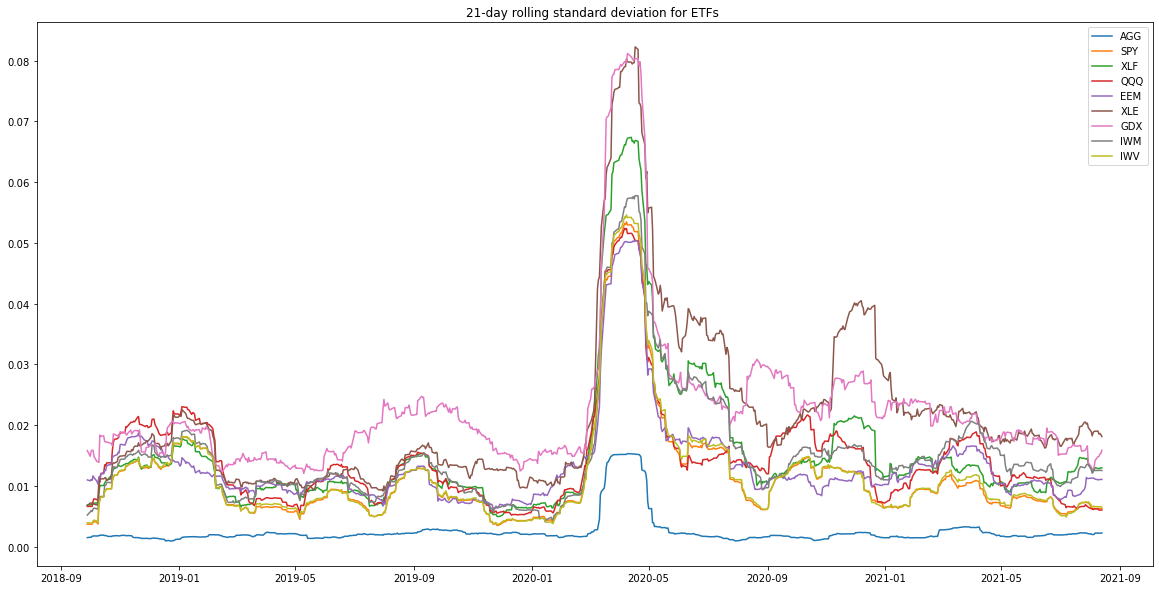

In [40]:
rolling_std = daily_returns.rolling(window = 30).std()
rolling_std.plot(figsize= (20,10), 
                 title = '21-day rolling standard deviation for ETFs ')

In [50]:
# Create a simulation object
# This portfolio currently has equal weighting - use ipywidgets - slider? - to define?
# We set the number of simulations trials to be 50
# The period over which we will simulate is the number of trading days in a year times the number of years.
ten_year_simulation = MCSimulation(
    portfolio_data=alpaca_df,
# Removed Weighting - use widget for user define? Currently equal weight across all ETFs
# Use widgets for # simulations and trading days/investment horizon?
    num_simulation=50,
    num_trading_days=252*10,
)

In [44]:
# Run the Monte Carlo simulation to forecast the cumulative return - use widget button?
ten_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996842,0.993344,1.013555,0.997458,0.998716,1.003815,0.997164,0.998414,0.996633,1.003279,...,1.002148,0.995998,0.994142,0.983867,1.003106,0.992722,0.998611,1.011607,0.989895,1.004410
2,0.994241,1.004281,1.024180,1.001301,0.992784,1.009202,0.996275,1.005071,1.004256,1.000827,...,0.990360,0.994987,0.997360,0.987881,1.015217,0.993532,1.001982,1.022723,0.990501,1.014987
3,0.994578,0.993461,1.013642,0.995034,0.991589,1.012504,0.996807,1.015131,1.012975,0.996757,...,0.982239,1.000694,0.999499,0.977327,1.014149,1.002175,1.003447,1.021310,0.998763,1.010456
4,0.999373,1.002147,1.006746,1.002094,0.993998,1.012438,1.005663,1.005874,1.005788,0.995162,...,0.982130,0.994939,1.011538,0.971721,1.011667,1.017313,1.009943,1.021979,0.997904,1.008244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,3.925185,3.172450,3.804920,2.714064,5.678063,3.222747,3.551599,3.834725,6.188500,4.167666,...,5.658587,5.310671,2.519680,3.391790,4.813001,3.952983,3.706216,5.756570,2.752749,5.588462
2517,3.928345,3.140741,3.819037,2.693575,5.702527,3.250629,3.552668,3.796073,6.160804,4.179796,...,5.723313,5.298995,2.522854,3.391299,4.848454,3.955153,3.694611,5.745578,2.770947,5.667414
2518,3.928682,3.156551,3.814349,2.694852,5.647538,3.254571,3.577465,3.816543,6.218701,4.161275,...,5.679695,5.303574,2.544542,3.393041,4.812476,3.966822,3.714596,5.795527,2.798015,5.721918
2519,3.881687,3.129174,3.807009,2.722958,5.627027,3.247605,3.578805,3.828643,6.218015,4.177268,...,5.819762,5.341893,2.542968,3.410043,4.776497,3.981593,3.687372,5.844223,2.800005,5.734565


<AxesSubplot:title={'center':'50 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

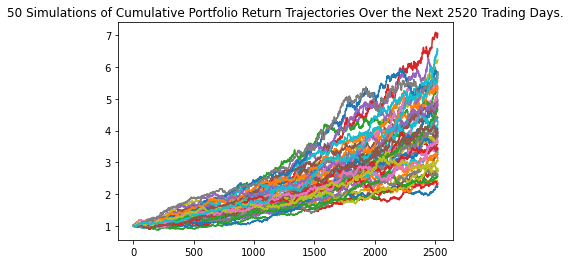

In [45]:
# Visualize the simulation by creating an
# overlay line plot
ten_year_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 50 Simulations'}, ylabel='Frequency'>

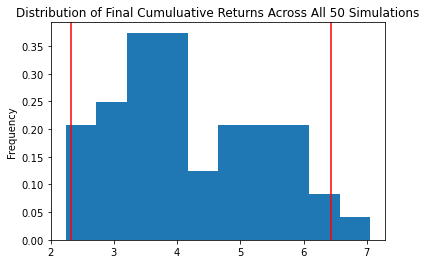

In [46]:
# Visualize distribution
#Defin axis?
ten_year_simulation.plot_distribution()

In [47]:
# Generate summary statistics from the simulation results
ret = ten_year_simulation.summarize_cumulative_return()
ret.to_frame()

,2520
count,50.000000
mean,4.153083
std,1.210610
min,2.240639
25%,3.294078
50%,3.885748
75%,5.154725
max,7.054044
95% CI Lower,2.326816
95% CI Upper,6.429678


In [48]:
display(type(ret), ret)
list(ret)

pandas.core.series.Series

count           50.000000
mean             4.153083
std              1.210610
min              2.240639
25%              3.294078
50%              3.885748
75%              5.154725
max              7.054044
95% CI Lower     2.326816
95% CI Upper     6.429678
Name: 2520, dtype: float64

[50.0,
 4.153082919989423,
 1.2106097861182106,
 2.2406394585310685,
 3.2940783473807667,
 3.885748018855982,
 5.1547251530376785,
 7.054044271049764,
 2.3268156757634637,
 6.429677759987883]

In [49]:
inv = 10000
min_ret = ret[8]*inv
max_ret = ret[9]*inv
min_ret, max_ret

(23268.15675763464, 64296.777599878835)

In [52]:
# Compute summary statistics from the simulated daily returns
simulated_returns_data = {
    "mean": list(ten_year_simulation.simulated_return.mean(axis=1)),
    "median": list(ten_year_simulation.simulated_return.median(axis=1)),
    "min": list(ten_year_simulation.simulated_return.min(axis=1)),
    "max": list(ten_year_simulation.simulated_return.max(axis=1))
}

# Create a DataFrame with the summary statistics
df_simulated_returns = pd.DataFrame(simulated_returns_data)

# Display sample data
df_simulated_returns

AttributeError: 'str' object has no attribute 'median'